# Reto Algoritmos y Datos Oct - 2022

Integrantes 

- Elisa Mota - A01752677
- Emiliano Quiroz - A01746310
- Francisco Diaz - A01746158
- Emilio Villacis - A01750148

# Tabla de Contenidos
1. [Librerias](#Librerias)
2. [Import Data](#Import_Data)
3. [PRE Analsis Descriptivo](#PRE_Analsis_Descriptivo)
   1. [Comprobacion de Duplicados](#Comprobacion_de_Duplicados)
   2. [Comprobacion de Datos Nulos](#Comprobacion_de_DATOS_NULOS)
   3. [Division Numericas Y Categoricas](#Division_NUMERICAS_Y_CATEGORICAS)
4. [Data Cleaning Process](#Data_Cleaning_Process)
   1. [Creacion Guia de Limpieza](#Creacion_GUIA_DE_LIMPIEZA)
   2. [Creacion Tabla Limpieza](#Creacion_Tabla_Limpieza)
      1. [Limpieza De NaNs](#Limpieza_De_NaNs)
      2. [Limpieza Outliers](#Limpieza_Outliers)
      3. [Outliers por cuantil](#Outliers_por_cuantil)
   3. [Ruta de limpieza](#Ruta_de_limpieza)
      1. [Eliminacion de variables 1ER Eliminar](#Eliminacion_de_variables_1ER_Eliminar)
      2. [Creación nuevas variables - Steps Condicion_New_Var](#Creación_nuevas_variables)
      3. [Eliminacion de variables 2ER Eliminar](#Eliminacion_de_variables_2ER_Eliminar)
      4. [Cambio tipo de Dato](#Cambio_tipo_de_Dato)
   4. [Analisis de Correlación](#Analisis_de_Correlación)
   5. [Analisis - variable objetivo - Skewness = Asimetria](#Analisis_variable_objetivo_Skewness_Asimetria)
   6. [Creación Dummie Variables](#Creación_Dummie_Variables)
5. [Exportar base de datos LIMPIA - DUMMIES / LIMPIA - NoDUMMIES](#Exportar)
5. [Correlacion con variables Dummie](#CorrD)
   1. [Determinar Variables Importantes](#DVIMP)
6. [Creacion Tabla Final Prediccion](#TablaFinal)
7. [Creacion Tabla Train y Test](#TablaXY)
8. [Modelos Predictivos](#Modelos)
   1. [Modelos Titulares](#ModelosTitulares)
      1. [Bayesian Ridge](#brr)
      2. [Light Gradient Boost](#l_gbm)
      3. [Decision Tree](#dtr)
      4. [Random Forest](#rfr)
      5. [XGB Regressor](#xgb)
      6. [Gradient Boost](#gbr)
9. [Comparativa Modelos Tabla](#Comparativa)
10. [Mejoramiento Random Forest](#rf_b)
11. [Rendimiento Máximo Random Forest](#ModeloF)
12. [Programa Uso del Modelo](#Program)
13. [Preguntas](#Preguntas)

## Librerias <a name="Librerias"></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import warnings
import dabl
from pprint import pprint

from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import shap
import xgboost as xgb
import lightgbm as lgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

## Import Data <a name="Import_Data"></a>

In [7]:
DATAHouse_RAW = pd.read_excel('SP_datosolucionesaprendizaje_VF.xlsx')

In [8]:
DATAHouse_RAW.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


## PRE Analisis Descriptivo <a name="PRE_Analsis_Descriptivo"></a>

In [9]:
DATAHouse_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
#NUmericas | dtypes: float64(12), int64(25), object(43)|

numericas = DATAHouse_RAW.select_dtypes(exclude=['object']).copy()
numericas
#numericas.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.000000
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.000000
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.000000
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.000000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,167081.220949
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,164788.778231
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,219222.423400
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,184924.279659


In [11]:
#Object |dtypes: float64(12), int64(25), object(43)|

Objects = DATAHouse_RAW.select_dtypes(include=['object']).copy()
#numeric_.columns
Objects

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [12]:
#Analisis Descriptivo Numericas
round(numericas.describe(),2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2896.00,2918.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,69.31,10168.11,6.09,5.56,1971.31,1984.26,102.20,441.42,...,93.71,47.49,23.10,2.60,16.06,2.25,50.83,6.21,2007.79,180052.85
std,842.79,42.52,23.34,7887.00,1.41,1.11,30.29,20.89,179.33,455.61,...,126.53,67.58,64.24,25.19,56.18,35.66,567.40,2.71,1.31,57381.57
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,730.50,20.00,59.00,7478.00,5.00,5.00,1953.50,1965.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,154795.08
50%,1460.00,50.00,68.00,9453.00,6.00,5.00,1973.00,1993.00,0.00,368.50,...,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,176734.84
75%,2189.50,70.00,80.00,11570.00,7.00,6.00,2001.00,2004.00,164.00,733.00,...,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,191895.74
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00


In [13]:
Objects.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


### Comprobacion de Duplicados <a name="Comprobacion_de_Duplicados"></a>

In [14]:
#Ver Duplicados 
DATAHouse_RAW.duplicated().sum()

0

### Comprobacion de Datos Nulos <a name="Comprobacion_de_DATOS_NULOS"></a>

In [15]:
DATAHouse_RAW.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
#Ver NaN en % con un dataframe 
#Ver valores faltantes en las variables

nan = pd.DataFrame(DATAHouse_RAW.isna().sum(), columns = ['NaN_sum'])
nan['Variable'] = nan.index
nan['Porcentaje(%)'] = round((nan['NaN_sum']/2919)*100,2)
nan = nan[nan['NaN_sum'] > 0] #dejar los que tienen mas de 1
nan = nan.sort_values(by = ['NaN_sum'],ascending=False)
nan['Usabilidad'] = np.where(nan['Porcentaje(%)'] > 20, 'Considerar', 'Limpiar')
nan['Tipo'] = DATAHouse_RAW.dtypes
nan

,NaN_sum,Variable,Porcentaje(%),Usabilidad,Tipo
PoolQC,2909,PoolQC,99.66,Considerar,object
MiscFeature,2814,MiscFeature,96.40,Considerar,object
Alley,2721,Alley,93.22,Considerar,object
Fence,2348,Fence,80.44,Considerar,object
FireplaceQu,1420,FireplaceQu,48.65,Considerar,object
LotFrontage,486,LotFrontage,16.65,Limpiar,float64
GarageFinish,159,GarageFinish,5.45,Limpiar,object
GarageQual,159,GarageQual,5.45,Limpiar,object
GarageCond,159,GarageCond,5.45,Limpiar,object
GarageYrBlt,159,GarageYrBlt,5.45,Limpiar,float64


In [17]:
numericas['BsmtFinSF1'].describe()

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [18]:
#COMPROBACION DE VARIABLES CATEGORICAS

Objects[Objects['Functional'].isnull()]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
2216,NaN,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,...,Attchd,Unf,Fa,Po,N,NaN,NaN,NaN,WD,Abnorml
2473,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,...,Detchd,Unf,TA,Fa,N,NaN,NaN,NaN,COD,Abnorml


### Division Numericas Y Categoricas <a name="Division_NUMERICAS_Y_CATEGORICAS"></a>

In [19]:
numericas = DATAHouse_RAW.select_dtypes(['int64','float64']).columns
categoricas = DATAHouse_RAW.select_dtypes(['object']).columns

In [20]:
DATAHouse_RAW[numericas].iloc[:, 0:10].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000


In [21]:
DATAHouse_RAW[numericas].iloc[:, 11:20].describe()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000
mean,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003
std,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969
min,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000
50%,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000
75%,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000
max,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000


In [22]:
DATAHouse_RAW[numericas].iloc[:, 21:30].describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000
mean,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811
std,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493
min,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000
75%,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000
max,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000


In [23]:
DATAHouse_RAW[numericas].iloc[:, 31:37].describe()

,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Data Cleaning Process <a name="Data_Cleaning_Process"></a>

### Creacion Guia de Limpieza <a name="Creacion_GUIA_DE_LIMPIEZA"></a>

In [24]:
#Creacion de tabla de confirmacion para limpiar a partir de la lectura del diccionario

nanTODOS = pd.DataFrame(DATAHouse_RAW.isna().sum(), columns = ['NaN_sum'])
nanTODOS['Variable'] = nanTODOS.index
nanTODOS['Porcentaje(%)'] = round((nanTODOS['NaN_sum']/2919)*100,2)
nanTODOS = nanTODOS.sort_values(by = ['NaN_sum'],ascending=False)
nanTODOS.loc[nanTODOS['Porcentaje(%)'] > 20, 'Usabilidad'] = 'Considerar'
nanTODOS.loc[(nanTODOS['Porcentaje(%)'] > 0) & (nanTODOS['Porcentaje(%)'] < 20), 'Usabilidad'] = 'Limpiar'
nanTODOS.loc[nanTODOS['Porcentaje(%)'] == 0, 'Usabilidad'] = 'Confirmar_tipo' 
nanTODOS['Tipo'] = DATAHouse_RAW.dtypes

confirmacion = nanTODOS.iloc[:,0:5].reset_index(drop=True).reindex(columns=['Variable','NaN_sum','Porcentaje(%)','Usabilidad','Tipo']) 
confirmacion.loc[confirmacion['Variable'] == 'PoolQC', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'#NA
confirmacion.loc[confirmacion['Variable'] == 'MiscFeature', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA
confirmacion.loc[confirmacion['Variable'] == 'Alley', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'#NA
confirmacion.loc[confirmacion['Variable'] == 'Fence', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'  #NA
confirmacion.loc[confirmacion['Variable'] == 'FireplaceQu', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'LotFrontage', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageCond', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageQual', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'  #NA
confirmacion.loc[confirmacion['Variable'] == 'GarageYrBlt', 'Hacer'] = 'Checar Outliers y poner MEDIA en NAs y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageFinish', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageType', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtCond', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtExposure', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtQual', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtFinType2', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtFinType1', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'#NA
confirmacion.loc[confirmacion['Variable'] == 'MasVnrType', 'Hacer'] = 'Cambiar NAs por "None" y debe ser string'#NA
confirmacion.loc[confirmacion['Variable'] == 'MasVnrArea', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float'#NA  
confirmacion.loc[confirmacion['Variable'] == 'MSZoning', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtHalfBath', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float'#NA
confirmacion.loc[confirmacion['Variable'] == 'Functional', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string'#NA
confirmacion.loc[confirmacion['Variable'] == 'BsmtFullBath', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float'#NA
confirmacion.loc[confirmacion['Variable'] == 'Utilities', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtUnfSF', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'KitchenQual', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'BsmtFinSF1', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'SaleType', 'Hacer'] = 'Cambiar NAs por Oth y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageCars', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'GarageArea', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float'  #NA
confirmacion.loc[confirmacion['Variable'] == 'TotalBsmtSF', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA 
confirmacion.loc[confirmacion['Variable'] == 'Exterior2nd', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'Exterior1st', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string' #NA 
confirmacion.loc[confirmacion['Variable'] == 'Electrical', 'Hacer'] = 'Cambiar NAs por MODA y debe ser string'  #NA
confirmacion.loc[confirmacion['Variable'] == 'BsmtFinSF2', 'Hacer'] = 'Cambiar NAs por la MEDIA y debe ser float' #NA
confirmacion.loc[confirmacion['Variable'] == 'TotRmsAbvGrd', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'
confirmacion.loc[confirmacion['Variable'] == 'Fireplaces', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'MSSubClass', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser String'  
confirmacion.loc[confirmacion['Variable'] == 'BedroomAbvGr', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'PavedDrive', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'WoodDeckSF', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'OpenPorchSF', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'EnclosedPorch', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == '3SsnPorch', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'ScreenPorch', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'PoolArea', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'MiscVal', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'MoSold', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser STRING PUEDE CREARSE OTRA COLUMNA CON MES COMO TAL'  
confirmacion.loc[confirmacion['Variable'] == 'YrSold', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'SaleCondition', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'KitchenAbvGr', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'
confirmacion.loc[confirmacion['Variable'] == 'CentralAir', 'Hacer'] = 'HACER DUMMIE 1/0 Y SER STRING'
confirmacion.loc[confirmacion['Variable'] == 'HalfBath', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'OverallCond', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'LotArea', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'Street', 'Hacer'] = 'HACER DUMMIE 1/0 Y SER STRING'  
confirmacion.loc[confirmacion['Variable'] == 'LotShape', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'LandContour', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'LotConfig', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'LandSlope', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'Neighborhood', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'Condition1', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'Condition2', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'BldgType', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'HouseStyle', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'OverallQual', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'YearBuilt', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser string'
confirmacion.loc[confirmacion['Variable'] == 'FullBath', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'
confirmacion.loc[confirmacion['Variable'] == 'YearRemodAdd', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser string COMPROBAR SI ES EL MISMO QUE CONSTRUCCION SI NO HAY REMODELACIONES, EN CASO DE SER REQUERIDO CREAR COLUMNA'  
confirmacion.loc[confirmacion['Variable'] == 'RoofStyle', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'RoofMatl', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'ExterQual', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'ExterCond', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'Foundation', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'Heating', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == 'HeatingQC', 'Hacer'] = 'Debe ser string'  
confirmacion.loc[confirmacion['Variable'] == '1stFlrSF', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == '2ndFlrSF', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'LowQualFinSF', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'GrLivArea', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  
confirmacion.loc[confirmacion['Variable'] == 'SalePrice', 'Hacer'] = 'CHECAR OUTLIERS Y debe ser float'  


confirmacion.head(10)

,Variable,NaN_sum,Porcentaje(%),Usabilidad,Tipo,Hacer
0,PoolQC,2909,99.66,Considerar,object,"Cambiar NAs por ""None"" y debe ser string"
1,MiscFeature,2814,96.40,Considerar,object,"Cambiar NAs por ""None"" y debe ser string"
2,Alley,2721,93.22,Considerar,object,"Cambiar NAs por ""None"" y debe ser string"
3,Fence,2348,80.44,Considerar,object,"Cambiar NAs por ""None"" y debe ser string"
4,FireplaceQu,1420,48.65,Considerar,object,"Cambiar NAs por ""None"" y debe ser string"
5,LotFrontage,486,16.65,Limpiar,float64,Cambiar NAs por la MEDIA y debe ser float
6,GarageFinish,159,5.45,Limpiar,object,"Cambiar NAs por ""None"" y debe ser string"
7,GarageQual,159,5.45,Limpiar,object,"Cambiar NAs por ""None"" y debe ser string"
8,GarageCond,159,5.45,Limpiar,object,"Cambiar NAs por ""None"" y debe ser string"
9,GarageYrBlt,159,5.45,Limpiar,float64,Checar Outliers y poner MEDIA en NAs y debe se...


In [25]:
#Exportar a excel GUIA DE LIMPIEZA 
confirmacion.to_excel('GuiaLimpiezaHouse.xlsx') 

### Creacion Tabla Limpieza <a name="Creacion_Tabla_Limpieza"></a>

In [26]:
#Dataframe to clean 
Houseprocesing = DATAHouse_RAW
Houseprocesing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Limpieza De NaNs  <a name="Limpieza_De_NaNs"></a>

In [27]:
#CAMBIOS DE NaNs .apply(str)
# Cambiar NAs por "None" y debe ser STRING 

for col in ["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtQual","Fence","FireplaceQu",
            "GarageCond","GarageFinish","GarageQual","GarageType","MasVnrType","MiscFeature","PoolQC"]:
    Houseprocesing[col] = Houseprocesing[col].fillna('None')
    
#CAMBIOS DE NaNs .apply(str)
# Cambiar NAs por "MEDIA" y debe ser float 

Houseprocesing['BsmtFinSF1'].fillna(int(Houseprocesing['BsmtFinSF1'].mean()), inplace=True) 
Houseprocesing['BsmtFinSF2'].fillna(int(Houseprocesing['BsmtFinSF2'].mean()), inplace=True) 
Houseprocesing['BsmtFullBath'].fillna(int(Houseprocesing['BsmtFullBath'].mean()), inplace=True) 
Houseprocesing['BsmtHalfBath'].fillna(int(Houseprocesing['BsmtHalfBath'].mean()), inplace=True) 
Houseprocesing['BsmtUnfSF'].fillna(int(Houseprocesing['BsmtUnfSF'].mean()), inplace=True) 
Houseprocesing['GarageArea'].fillna(int(Houseprocesing['GarageArea'].mean()), inplace=True) 
Houseprocesing['GarageCars'].fillna(int(Houseprocesing['GarageCars'].mean()), inplace=True) 
Houseprocesing['LotFrontage'].fillna(int(Houseprocesing['LotFrontage'].mean()), inplace=True) 
Houseprocesing['BsmtFinSF1'].fillna(int(Houseprocesing['BsmtFinSF1'].mean()), inplace=True)
Houseprocesing['MasVnrArea'].fillna(int(Houseprocesing['MasVnrArea'].mean()), inplace=True) 
Houseprocesing['TotalBsmtSF'].fillna(int(Houseprocesing['TotalBsmtSF'].mean()), inplace=True) 

Houseprocesing['GarageYrBlt'].fillna(int(Houseprocesing['GarageYrBlt'].mean()), inplace=True) 

#CAMBIOS DE NaNs .apply(str)
# Cambiar NAs por "MODA" y debe ser string 

for column in ['Electrical', 'Functional', 'KitchenQual', 'MSZoning', 'Utilities','Exterior1st','Exterior2nd','SaleType']:
    Houseprocesing[column].fillna(Houseprocesing[column].mode()[0], inplace=True)

In [28]:
# COMPROBACION nas
Houseprocesing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

#### Limpieza Outliers <a name="Limpieza_Outliers"></a>

##### Outliers por cuantil <a name="Outliers_por_cuantil"></a>

In [29]:
Quantile95 = pd.DataFrame(
    (Houseprocesing[numericas]>Houseprocesing[numericas].quantile(0.95))
                          .sum()
                          .sort_values(ascending=False), 
                          columns= ['Quantil_95']).reset_index()

Quantile95.rename(columns= {'index':'Variables'}, inplace = True)

Quantile5 = pd.DataFrame((Houseprocesing[numericas]<Houseprocesing[numericas].quantile(0.05))
                          .sum()
                          .sort_values(ascending=False),
                         columns= ['Quantil_5']).reset_index()

Quantile5.rename(columns= {'index':'Variables'}, inplace = True)

Quantiles = pd.merge(Quantile95,Quantile5, on='Variables', how='outer')
Quantiles

,Variables,Quantil_95,Quantil_5
0,Id,146,146
1,BsmtUnfSF,146,0
2,OpenPorchSF,146,0
3,GarageArea,146,0
4,GrLivArea,146,145
5,2ndFlrSF,146,0
6,1stFlrSF,146,146
7,TotalBsmtSF,146,146
8,SalePrice,146,146
9,LotArea,146,139


*REMOVING OUTLIERS*

Se debe remover valores extremos en las variables, existen demasiadas variables con presencia de ellos. 
Esto o bien indica que las base no sigue la normal o que definivamente la base esta realista a lo que 
muestra. 

Dado el anterior analisis , se pueden tomar las siguientes cvariableas para su eliminacion de valores 
pero para terminos academicos se omitira los outliers. cosa que obsolutamente no es recomendable en un
analisis estadistico. 

In [30]:
#EN CASO DE LIMPIEZA SE PUEDE RECURRIR CON ESTE CODIGO

#seleccionadas por opinion
#LotFrontage 135 144
#LotArea 146 139
#BsmtFinSF1 145
#TotalBsmtSF 146 146
#GrLivArea 146 145

#Houseprocesing = Houseprocesing.drop(Houseprocesing[Houseprocesing['LotFrontage'] > 200].index)
#Houseprocesing = Houseprocesing.drop(Houseprocesing[Houseprocesing['LotArea'] > 100000].index)
#Houseprocesing = Houseprocesing.drop(Houseprocesing[Houseprocesing['BsmtFinSF1'] > 4000].index)
#Houseprocesing = Houseprocesing.drop(Houseprocesing[Houseprocesing['TotalBsmtSF'] > 5000].index)
#Houseprocesing = Houseprocesing.drop(Houseprocesing[Houseprocesing['GrLivArea'] > 4000].index)


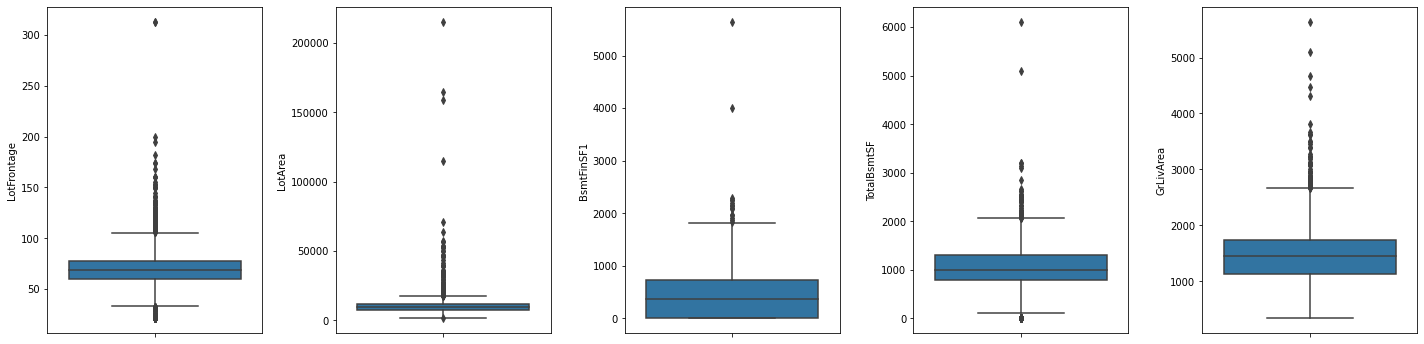

In [31]:
outliers_columnas = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(outliers_columnas):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=Houseprocesing)
fig.tight_layout(pad=1.5)

### Ruta de limpieza <a name="Ruta_de_limpieza"></a>

In [32]:
Guia_creacion_Var = pd.read_excel('Variables_Houses.xlsb',sheet_name = 1)
Guia_creacion_Var

,New_Var_Name,Condicion_NEW_Var,1ER Eliminar,2ER Eliminar,Variable
0,NaN,NaN,X,NaN,Neighborhood
1,CalifGeneralTotal,2,NaN,X,OVerallQual
2,CalifGeneralTotal,2,NaN,X,OverallCond
3,NaN,NaN,X,NaN,YearRemodAdd
4,Total_sqr_footage,3,NaN,X,BsmtFinSF1
5,Total_sqr_footage,3,NaN,X,BsmtFinSF2
6,NaN,NaN,X,NaN,BsmtUnfSF
7,"Total_sqr_floors_averg,Total_sqr_footage","3,5",NaN,X,1stFlrSF
8,"Total_sqr_floors_averg,Total_sqr_footage","3,5",NaN,X,2ndFlrSF
9,NaN,NaN,X,NaN,LowQualFinSF


#### Eliminacion de variables 1ER Eliminar <a name="Eliminacion_de_variables_1ER_Eliminar"></a>

Las siguientes variables serán eiminadas del dataset final debido a que: a opinion grupal, no aportan caracter significativo para la determinacion del objetivo del proyecto. 

1. BsmtUnfSF
2. LowQualFinSF
3. GarageArea
4. YearRemodAdd
5. GarageYrBlt
6. Neighborhood #SESGA LA PREDICCION DE VALOR DE UNA CASA 
7. LotFrontage


In [33]:
#Eliminación
inutiles = ['BsmtUnfSF','LowQualFinSF','GarageArea','YearRemodAdd','GarageYrBlt',
            'Neighborhood','LotFrontage'] 
Houseprocesing = Houseprocesing.drop(inutiles, axis = 1)

 #inplace=True)

In [34]:
#Comprobacióin DEBEN SER 74 por id
n = len(Houseprocesing.columns)
print("Number of columns is:", n)

Number of columns is: 74


#### Creación nuevas variables - Steps Condicion_New_Var <a name="Creación_nuevas_variables"></a>

In [35]:
Guia_creacion_Var[['Condicion_NEW_Var','New_Var_Name']].dropna().drop_duplicates()

,Condicion_NEW_Var,New_Var_Name
1,2,CalifGeneralTotal
4,3,Total_sqr_footage
7,"3,5","Total_sqr_floors_averg,Total_sqr_footage"
10,1,PIES2porhabitacion
11,4,Total_Baths
13,"1,4","PIES2porhabitacion,Total_Baths"
19,6,Total_porch_SF


In [36]:
#CREACION DE NUEVAS COLUMNAS 
#PASOS Condicion_New_Var
#1
Houseprocesing["PIES2porhabitacion"] = Houseprocesing["GrLivArea"] / (Houseprocesing["TotRmsAbvGrd"] +
                                                       Houseprocesing["FullBath"] +
                                                       Houseprocesing["HalfBath"] +
                                                       Houseprocesing["KitchenAbvGr"])
#2 
Houseprocesing['CalifGeneralTotal'] = (Houseprocesing['OverallQual'] + Houseprocesing['OverallCond'])/2

#3
Houseprocesing['Total_sqr_footage'] = (Houseprocesing['BsmtFinSF1'] + Houseprocesing['BsmtFinSF2'] +
                                 Houseprocesing['1stFlrSF'] + Houseprocesing['2ndFlrSF'])

#4
Houseprocesing['Total_Baths'] = (Houseprocesing['FullBath'] + (0.5 * Houseprocesing['HalfBath']) +
                               Houseprocesing['BsmtFullBath'] + (0.5 * Houseprocesing['BsmtHalfBath']))
# promedio 5

Houseprocesing["Total_sqr_floors_averg"] = (Houseprocesing["1stFlrSF"] + Houseprocesing["2ndFlrSF"])/2

#6

Houseprocesing['Total_porch_SF'] = (Houseprocesing['OpenPorchSF'] + Houseprocesing['3SsnPorch'] +
                              Houseprocesing['EnclosedPorch'] + Houseprocesing['ScreenPorch'])

#Comprobacióin DEBEN SER 80 por id
n = len(Houseprocesing.columns)
print("Number of columns is:", n)

Number of columns is: 80


#### Eliminacion de variables 2ER Eliminar <a name="Eliminacion_de_variables_2ER_Eliminar"></a>

In [37]:
Guia_creacion_Var[['Variable','2ER Eliminar']].dropna()

,Variable,2ER Eliminar
1,OVerallQual,X
2,OverallCond,X
4,BsmtFinSF1,X
5,BsmtFinSF2,X
7,1stFlrSF,X
8,2ndFlrSF,X
10,GrLivArea,X
11,BsmtFullBath,X
12,BsmtHalfBath,X
13,FullBath,X


In [38]:
#Eliminación
inutiles_2gen = ['OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','1stFlrSF',
            '2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath','KitchenAbvGr','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'] 
Houseprocesing = Houseprocesing.drop(inutiles_2gen, axis = 1)

#Comprobacióin DEBEN SER 64
n = len(Houseprocesing.columns)
print("Number of columns is:", n)

Number of columns is: 64


#### Cambio tipo de Dato <a name="Cambio_tipo_de_Dato"></a>

In [39]:
#VACMBAIR TIPO DE DATO    No numericos como strings

Houseprocesing['MSSubClass'] = Houseprocesing['MSSubClass'].apply(str)
#Houseprocesing['YrSold'] = Houseprocesing['YrSold'].apply(str)
#Houseprocesing['MoSold'] = Houseprocesing['MoSold'].apply(str)
#Houseprocesing['YearBuilt'] = Houseprocesing['YearBuilt'].apply(str)
Houseprocesing['Id'] = Houseprocesing['Id'].apply(str)

### Analisis de Correlación <a name="Analisis_de_Correlación"></a>

Al paracer no hay problemas de multicolineadidad que pudiese presentarse, esto puede deberse a que anteiormente
se eliminaron variables que pudieron haber tenido problemas de ello. Por lo que se analiza, no habra eliminacion 
de variables. El analisis lo comprueba y por ende es valido. 

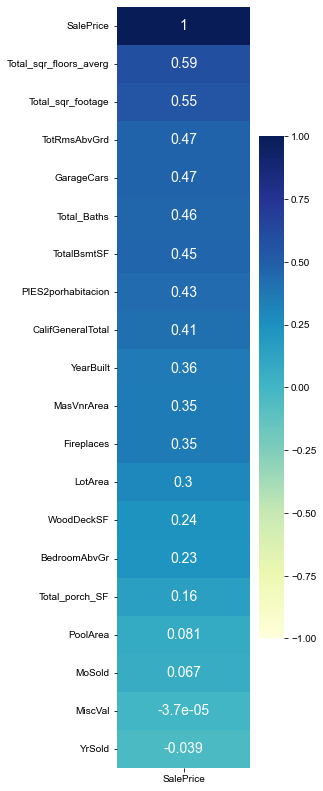

In [40]:
corr_new_train=Houseprocesing.corr()
plt.figure(figsize=(3,14))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                                      ascending=False).head(30),annot_kws={"size":14},
            vmin=-1, cmap='YlGnBu', annot=True)
sns.set(font_scale=1)

<AxesSubplot:>

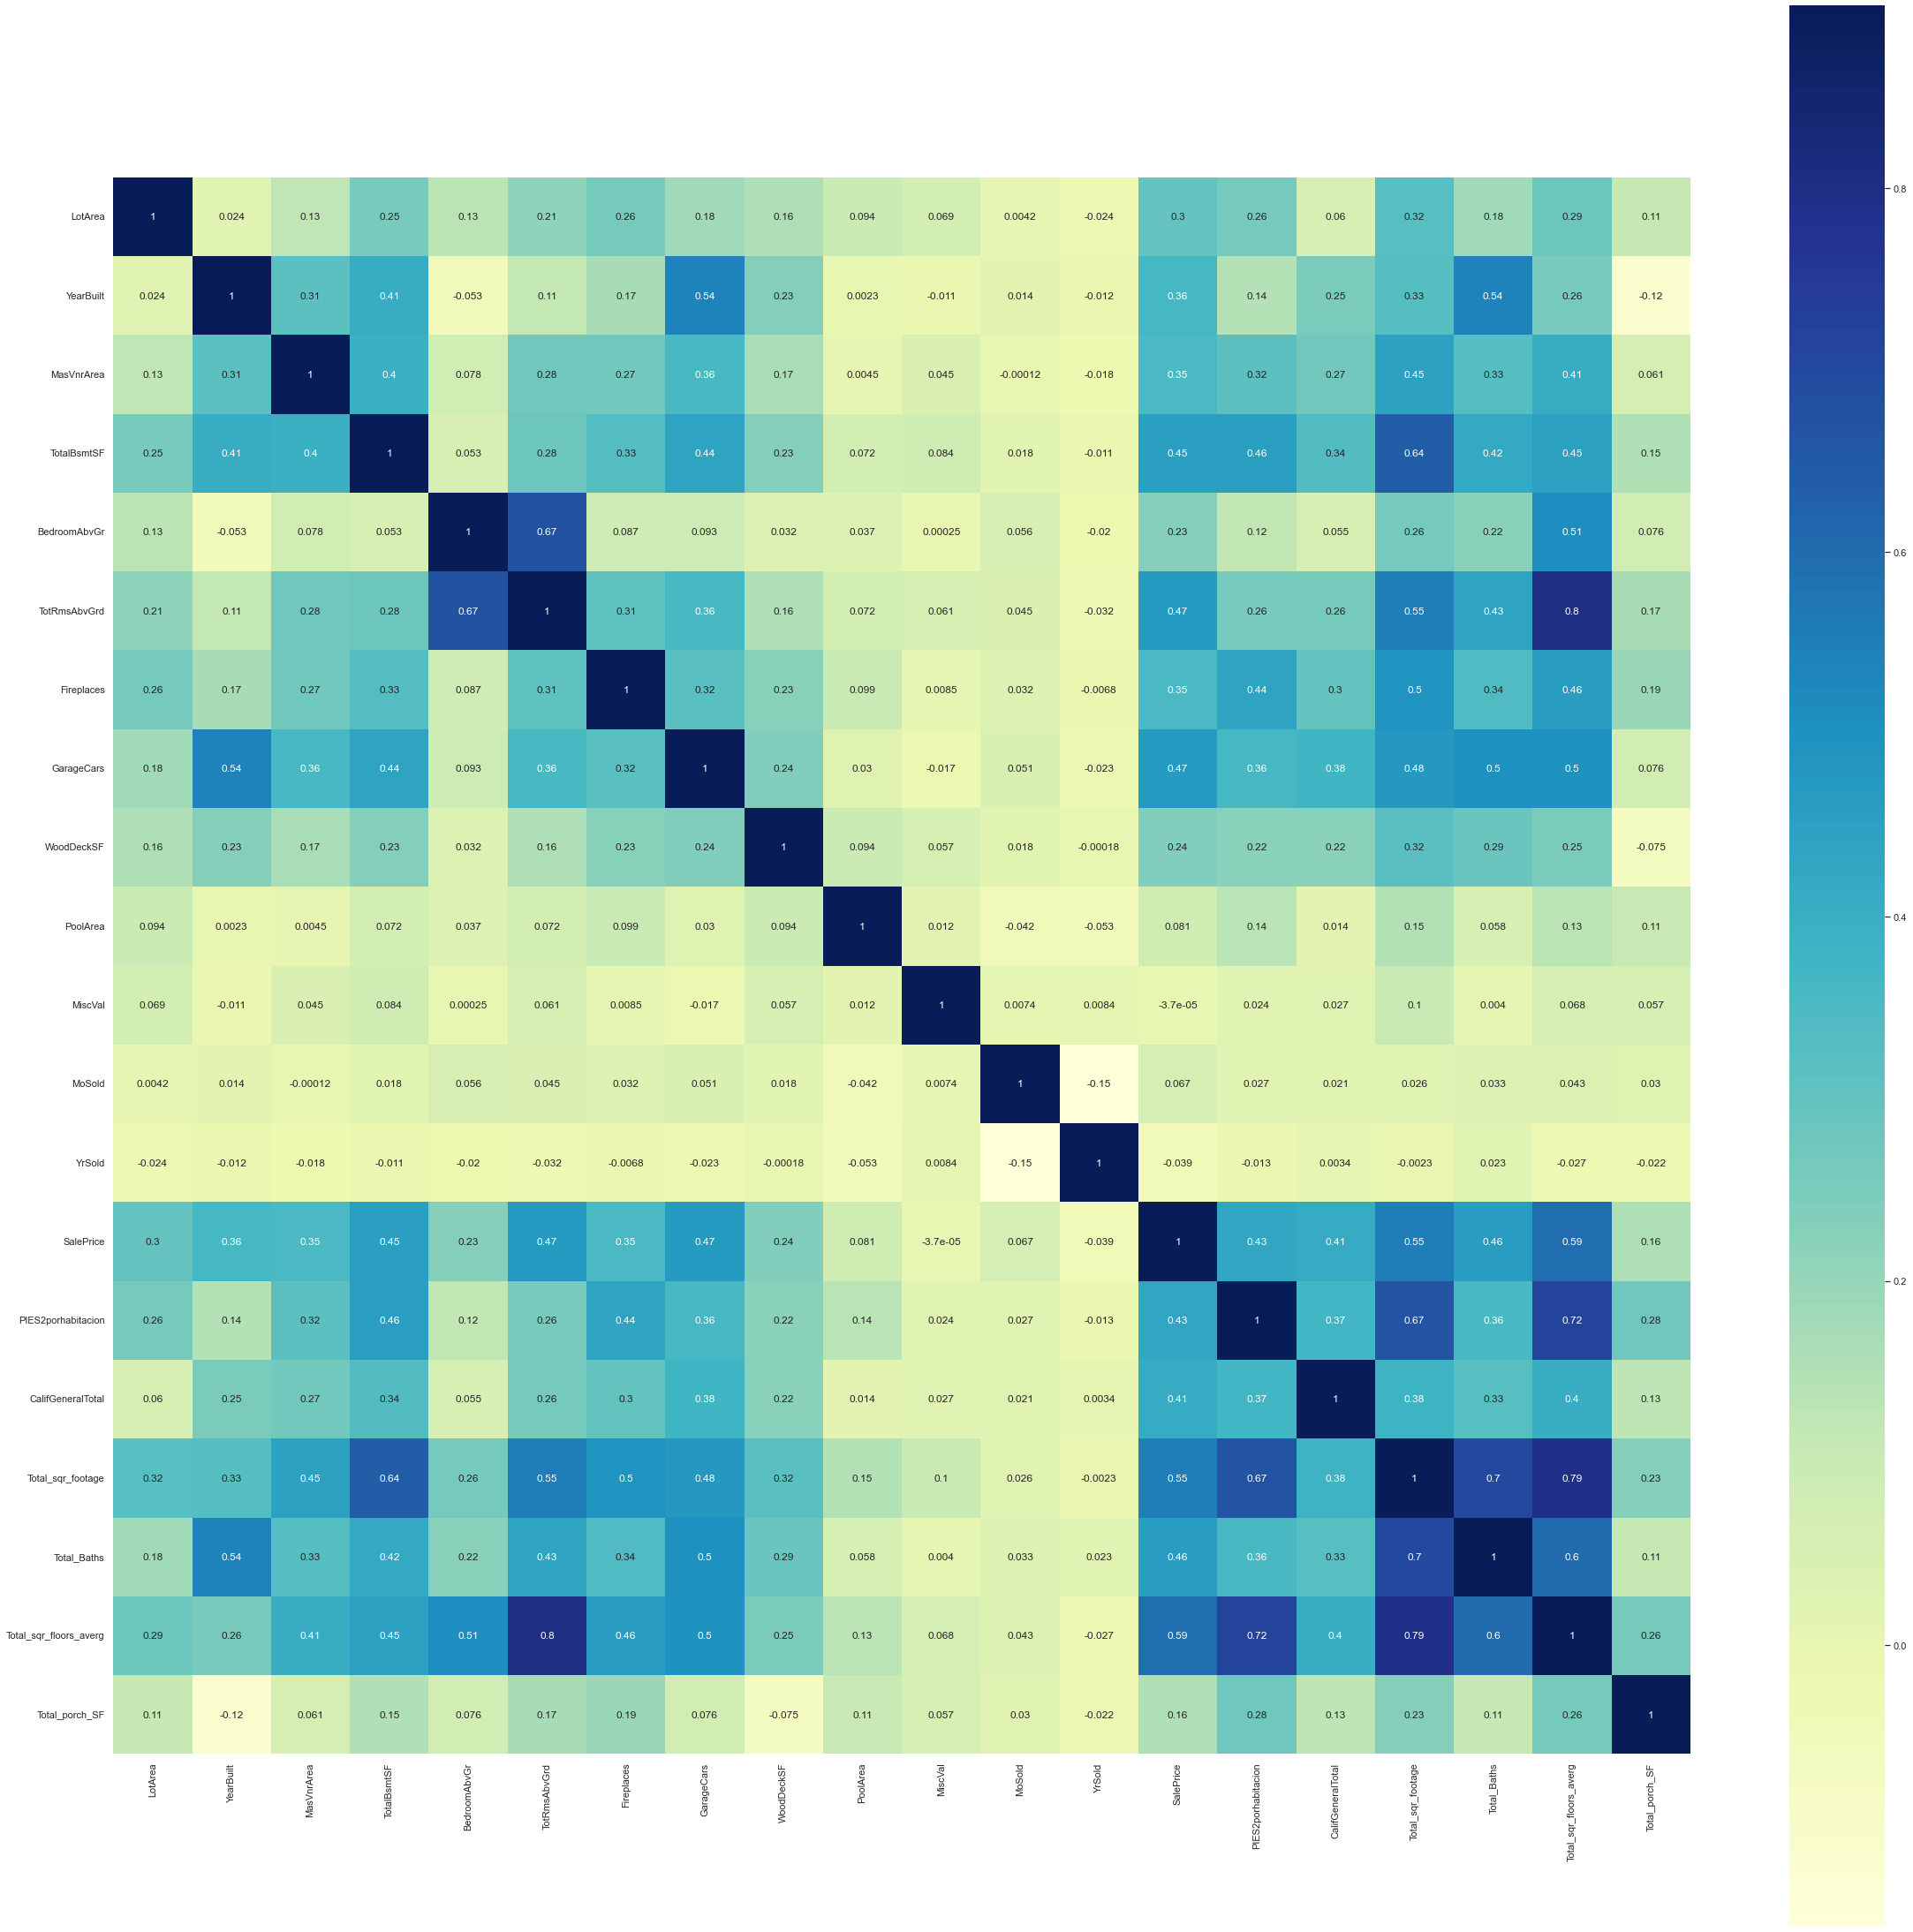

In [41]:
#Correlation map to see how features are correlated with SalePrice
corrmat = Houseprocesing.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(corrmat, vmax=0.9,annot = True, square=True, cmap = 'YlGnBu')

### Analisis - variable objetivo - Skewness = Asimetria <a name="Analisis_variable_objetivo_Skewness_Asimetria"></a>

La distribución está sesgada hacia la Izquierda, donde la cola del lado Izquierdo de la curva es
más larga que la cola del lado Derecho, y la media es mayor que la moda. Esta situación también
se denomina asimetría positiva.
Tener un objetivo sesgado afectará al rendimiento general de nuestro modelo de aprendizaje automático,
por lo tanto, una forma de aliviarlo será utilizar la transformación logarítmica en el objetivo 
sesgado, en nuestro caso, el Precio de Venta para reducir el sesgo de la distribución.



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


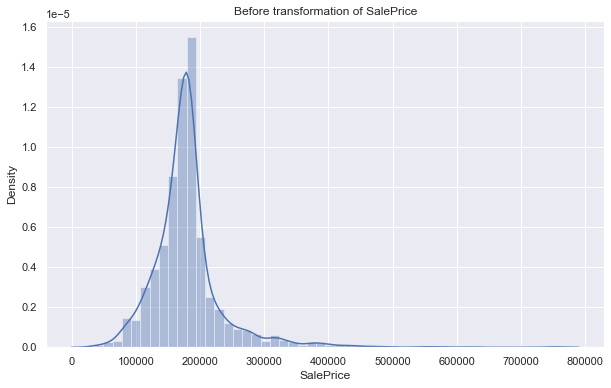

In [42]:
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(Houseprocesing['SalePrice'],norm_hist=False)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


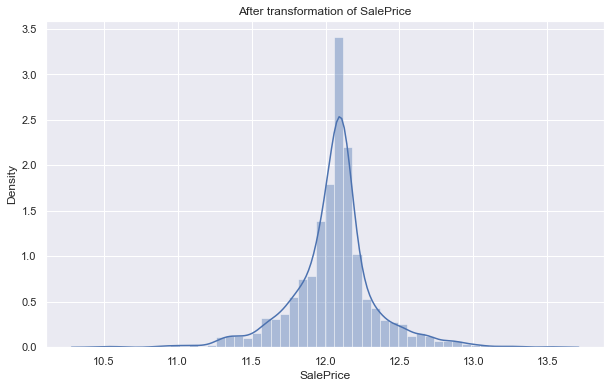

In [43]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(Houseprocesing['SalePrice']),norm_hist=False)

In [44]:
#y["SalePrice"] = np.log(y['SalePrice'])

#Now that we are satisfied with our final data, we will proceed to the part where we will
#solve this regression problem - Modeling

### Creación Dummie Variables <a name="Creación_Dummie_Variables"></a>

In [45]:
# Creating dummy variables from categorical features
#Eliminación
Id = ['Id'] 
Houseprocesing_WO_ID = Houseprocesing.drop(Id, axis = 1)

non_dummy_cols = ['YrSold','MoSold','YearBuilt','LotArea', 'MasVnrArea',
                  'TotalBsmtSF', 'BedroomAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars',
                  'WoodDeckSF', 'MiscVal','SalePrice', 'PIES2porhabitacion', 
                  'CalifGeneralTotal','Total_sqr_footage', 'Total_Baths', 'Total_sqr_floors_averg',
                  'Total_porch_SF','PoolArea']

Houseprocesing_WO_ID_WDUM = pd.get_dummies(Houseprocesing_WO_ID,
                                  columns=[col for col in Houseprocesing_WO_ID.columns 
                                           if col not in non_dummy_cols])
Houseprocesing_WO_ID_WDUM.columns.values



array(['LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'PIES2porhabitacion', 'CalifGeneralTotal',
       'Total_sqr_footage', 'Total_Baths', 'Total_sqr_floors_averg',
       'Total_porch_SF', 'MSSubClass_120', 'MSSubClass_150',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_None', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_Al

In [46]:
Houseprocesing_WO_ID_WDUM['Id'] = Houseprocesing['Id']
Houseprocesing_WO_ID_WDUM.head(2)

,LotArea,YearBuilt,MasVnrArea,TotalBsmtSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,PoolArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,8450,2003,196.0,856.0,3,8,0,2.0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,9600,1976,0.0,1262.0,3,6,1,2.0,298,0,...,0,0,1,0,0,0,0,1,0,2


In [47]:
len(Houseprocesing_WO_ID_WDUM.columns.values)

278

## Exportar base de datos LIMPIA - DUMMIES / LIMPIA - NoDUMMIES <a name="Exportar"></a> 

In [48]:
#Exportar a excel BASE DE DATOS LIMPIA CON DUMMIES
Houseprocesing_WO_ID_WDUM.to_excel('Houseprocesing_WO_ID_WDUM.xlsx') 


#Exportar a excel BASE DE DATOS LIMPIA SIN DUMMIES
Houseprocesing.to_excel('HouseprocesingLIMPIA.xlsx') 


## Correlacion con variables Dummie <a name="CorrD"></a> 

### Determinar variables importantes/ eliminar algunas <a name="DVIMP"></a> 

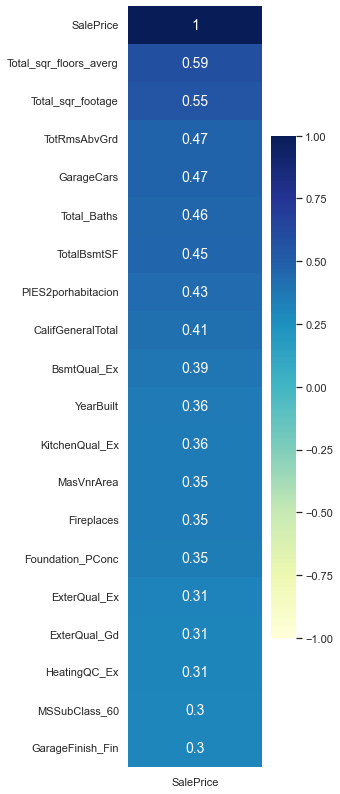

In [49]:
corr_new_train_2_=Houseprocesing_WO_ID_WDUM.corr()
plt.figure(figsize=(3,14))
sns.heatmap(corr_new_train_2_[['SalePrice']].sort_values(by=['SalePrice'],
                                                      ascending=False).head(20),annot_kws={"size":14},
            vmin=-1, cmap='YlGnBu', annot=True)
sns.set(font_scale=1)

In [50]:
variablesimportantes = pd.DataFrame(data = corr_new_train_2_[['SalePrice']].sort_values(by=['SalePrice'],
                                                      ascending=False).head(20)).reset_index()
                                    

variablesimportantes = variablesimportantes.rename(columns={"index": "variables","SalePrice": "corr_SalePrice"})

variablesimp_list = variablesimportantes['variables'].tolist()


variablesimp_list

['SalePrice',
 'Total_sqr_floors_averg',
 'Total_sqr_footage',
 'TotRmsAbvGrd',
 'GarageCars',
 'Total_Baths',
 'TotalBsmtSF',
 'PIES2porhabitacion',
 'CalifGeneralTotal',
 'BsmtQual_Ex',
 'YearBuilt',
 'KitchenQual_Ex',
 'MasVnrArea',
 'Fireplaces',
 'Foundation_PConc',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'HeatingQC_Ex',
 'MSSubClass_60',
 'GarageFinish_Fin']

## Creacion Tabla Final para prediccion <a name="TablaFinal"></a> 

In [51]:

HousetablePredictionsFinal = Houseprocesing_WO_ID_WDUM[np.intersect1d(Houseprocesing_WO_ID_WDUM.columns, variablesimp_list)]
HousetablePredictionsFinal['Id'] = Houseprocesing_WO_ID_WDUM['Id']
HousetablePredictionsFinal.head(10)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,BsmtQual_Ex,CalifGeneralTotal,ExterQual_Ex,ExterQual_Gd,Fireplaces,Foundation_PConc,GarageCars,GarageFinish_Fin,HeatingQC_Ex,KitchenQual_Ex,...,MasVnrArea,PIES2porhabitacion,SalePrice,TotRmsAbvGrd,TotalBsmtSF,Total_Baths,Total_sqr_floors_averg,Total_sqr_footage,YearBuilt,Id
0,0,6.0,0,1,0,1,2.0,0,1,0,...,196.0,142.500000,208500.0,8,856.0,3.5,855.0,2416.0,2003,1
1,0,7.0,0,0,1,0,2.0,0,1,0,...,0.0,140.222222,181500.0,6,1262.0,2.5,631.0,2240.0,1976,2
2,0,6.0,0,1,1,1,2.0,0,1,0,...,162.0,178.600000,223500.0,6,920.0,3.5,893.0,2272.0,2001,3
3,0,6.0,0,0,1,0,3.0,0,0,0,...,0.0,190.777778,140000.0,7,756.0,2.0,858.5,1933.0,1915,4
4,0,6.5,0,1,1,1,3.0,0,1,0,...,350.0,169.076923,250000.0,9,1145.0,3.5,1099.0,2853.0,2000,5
5,0,5.0,0,0,0,0,2.0,0,1,0,...,0.0,170.250000,143000.0,5,796.0,2.5,681.0,2094.0,1993,6
6,1,6.5,0,1,1,1,2.0,0,1,0,...,186.0,169.400000,307000.0,7,1686.0,3.0,847.0,3063.0,2004,7
7,0,6.5,0,0,2,0,2.0,0,1,0,...,240.0,190.000000,200000.0,7,1107.0,3.5,1045.0,2981.0,1973,8
8,0,6.0,0,0,2,0,2.0,0,0,0,...,0.0,147.833333,129900.0,8,952.0,2.0,887.0,1774.0,1931,9
9,0,5.5,0,0,2,0,1.0,0,1,0,...,0.0,134.625000,118000.0,5,991.0,2.0,538.5,1928.0,1939,10


## Creacion Tabla Entrenamiento y Prueba <a name="TablaXY"></a> 

In [52]:
#Train: 67%, Test: 33%

y = HousetablePredictionsFinal.SalePrice
x = HousetablePredictionsFinal.drop('SalePrice',axis=1)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [54]:
print("shape of original dataset :", HousetablePredictionsFinal.shape)

Ids_x_train = x_train['Id']

x_train = x_train.drop('Id',axis=1)
print("shape of input - training set", x_train.shape)

print("shape of output - training set", y_train.shape)

Ids_x_test = x_test['Id']

x_test = x_test.drop('Id',axis=1)
print("shape of input - testing set", x_test.shape)

print("shape of output - testing set", y_test.shape)

shape of original dataset : (2919, 21)
shape of input - training set (1955, 19)
shape of output - training set (1955,)
shape of input - testing set (964, 19)
shape of output - testing set (964,)


In [55]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error (MAE): \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

## Modelos Predictivos <a name="Modelos"></a>

### Modelos Titulares <a name="ModelosTitulares"></a> 

#### Bayesian_Ridge_Reg <a name="brr"></a> 

In [56]:
# Bayesian Ridge Regression


brr = BayesianRidge(n_iter=300,
                    compute_score=True)
brr.fit(x_train, y_train)

#Model making a prediction on test data
prediction_brr = brr.predict(x_test)

evaluation(brr, x_train, y_train, x_test, y_test, True)
evaluation(brr, x_train, y_train, x_test, y_test, False)
 


Train Result:
Root Mean Squared Error: 43466.054781725055
_______________________________________________
Mean Squared Error: 1889297918.2879236
_______________________________________________
Mean Absolute Error: 
29628.66419425666
_______________________________________________


Test Result:
Root Mean Squared Error: 44203.01984556425
_______________________________________________
Mean Squared Error: 1953906963.467347
_______________________________________________
Mean Absolute Error (MAE): 
30359.728908486202
_______________________________________________


In [57]:
round(mean_absolute_error(y_test, brr.predict(x_test)),2)

30359.73

In [58]:
from numpy import sqrt

#### Light Gradient Boost Regressor <a name="l_gbm"></a> 

In [59]:
# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')

l_gbm.fit(x_train, y_train)

#Model making a prediction on test data
prediction_l_gbm = l_gbm.predict(x_test)

evaluation(l_gbm, x_train, y_train, x_test, y_test, True)
evaluation(l_gbm, x_train, y_train, x_test, y_test, False)
 

Train Result:
Root Mean Squared Error: 24567.798379782966
_______________________________________________
Mean Squared Error: 603576717.2296665
_______________________________________________
Mean Absolute Error: 
17110.71474050609
_______________________________________________


Test Result:
Root Mean Squared Error: 45177.52346401989
_______________________________________________
Mean Squared Error: 2041008626.342068
_______________________________________________
Mean Absolute Error (MAE): 
30222.518821241287
_______________________________________________


In [60]:

#LGB REGRESSOR 

lgb_regressor=lgb.LGBMRegressor(objective='regression', 
                                num_leaves=5, 
                                learning_rate=0.035, 
                                n_estimators=2177, 
                                max_bin=50, 
                                bagging_fraction=0.65,
                                bagging_freq=5, 
                                bagging_seed=7, 
                                feature_fraction=0.201, 
                                feature_fraction_seed=7,
                                n_jobs=-1)



#### Decision Tree Regressor <a name="dtr"></a> 

In [61]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

#Model making a prediction on test data
prediction_dtr = dtr.predict(x_test)

evaluation(dtr, x_train, y_train, x_test, y_test, True)
evaluation(dtr, x_train, y_train, x_test, y_test, False)


Train Result:
Root Mean Squared Error: 1796.719946304795
_______________________________________________
Mean Squared Error: 3228202.5654495056
_______________________________________________
Mean Absolute Error: 
140.71877899890876
_______________________________________________


Test Result:
Root Mean Squared Error: 60682.268958911176
_______________________________________________
Mean Squared Error: 3682337766.0016346
_______________________________________________
Mean Absolute Error (MAE): 
38062.65740027609
_______________________________________________


In [62]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### Random Forest Regressor <a name="rfr"></a> 

In [63]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

#Model making a prediction on test data
prediction_rfr = rfr.predict(x_test)

evaluation(rfr, x_train, y_train, x_test, y_test, True)
evaluation(rfr, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 17070.261677657516
_______________________________________________
Mean Squared Error: 291393833.7437028
_______________________________________________
Mean Absolute Error: 
11137.78548910582
_______________________________________________


Test Result:
Root Mean Squared Error: 42797.37169249374
_______________________________________________
Mean Squared Error: 1831615023.7854643
_______________________________________________
Mean Absolute Error (MAE): 
29392.483379103043
_______________________________________________


#### XGB Regressor <a name="xgb"></a> 

In [64]:
#XGB Regressor

xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

#Model making a prediction on test data
prediction_xgb = xgb.predict(x_test)


evaluation(xgb, x_train, y_train, x_test, y_test, True)
evaluation(xgb, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 7612.902525526325
_______________________________________________
Mean Squared Error: 57956284.863165095
_______________________________________________
Mean Absolute Error: 
5606.087731878976
_______________________________________________


Test Result:
Root Mean Squared Error: 47399.6752510761
_______________________________________________
Mean Squared Error: 2246729213.9074764
_______________________________________________
Mean Absolute Error (MAE): 
31041.77980621063
_______________________________________________


#### Gradient Boost Regressor <a name="gbr"></a> 

In [65]:
# Gradient Boost Regressor

gbr = GradientBoostingRegressor()

gbr.fit(x_train, y_train)

#Model making a prediction on test data
prediction_gbr = gbr.predict(x_test)

evaluation(gbr, x_train, y_train, x_test, y_test, True)
evaluation(gbr, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 29620.85354621973
_______________________________________________
Mean Squared Error: 877394964.806598
_______________________________________________
Mean Absolute Error: 
23403.804516217388
_______________________________________________


Test Result:
Root Mean Squared Error: 43922.2048447054
_______________________________________________
Mean Squared Error: 1929160078.4202623
_______________________________________________
Mean Absolute Error (MAE): 
30105.06135502395
_______________________________________________


## Comparativa Modelos TABLA <a name="Comparativa"></a> 

In [66]:
#Comparativa 

M1 = round(mean_absolute_error(y_test, brr.predict(x_test)),2)

M2 = round(mean_absolute_error(y_test, l_gbm.predict(x_test)),2)

M3 = round(mean_absolute_error(y_test, dtr.predict(x_test)),2)

M4 = round(mean_absolute_error(y_test, rfr.predict(x_test)),2)

M5 = round(mean_absolute_error(y_test, prediction_xgb),2)

M6 = round(mean_absolute_error(y_test, gbr.predict(x_test)),2)

comparativa = {'Modelo':['Bayesian_Ridge_Reg',
                         'Light Gradient Boost Regressor',
                         'Decision Tree Regressor',
                         'Random Forest Regressor',
                         'XGB Regressor',
                         'Gradient Boost Regressor'],'MAE_Test':[M1,M2,M3,M4,M5,M6]}

ComparativeModelsMAE = pd.DataFrame(comparativa)  

ComparativeModelsMAE

,Modelo,MAE_Test
0,Bayesian_Ridge_Reg,30359.73
1,Light Gradient Boost Regressor,30222.52
2,Decision Tree Regressor,38062.66
3,Random Forest Regressor,29392.48
4,XGB Regressor,31041.78
5,Gradient Boost Regressor,30105.06


## Mejoramiento Random Forest (Bosques Aleatorios - Parametros) <a name="rf_b"></a> 

Segun el portal de sklearn, los mejores parametros para eficientizar un modelo de bosques aleatorios son los siguientes: 


n_estimators = número de árboles en el bosque

max_features  = número máximo de funciones consideradas para dividir un nodo

max_depth  = número máximo de niveles en cada árbol de decisión

min_samples_split  = número mínimo de puntos de datos colocados en un nodo antes de dividir el nodo

min_samples_leaf  = número mínimo de puntos de datos permitidos en un nodo hoja

bootstrap  = método para muestrear puntos de datos (con o sin reemplazo)

#### Cuadrícula de hiperparámetros aleatorios - RandomizedSearchCV

In [67]:
# Número de árboles en un bosque aleatorio 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
# Número de características a considerar en cada división 
max_features = ['auto', 'sqrt'] 
# Número máximo de niveles en el árbol 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None) 
# Número mínimo de muestras requeridas para dividir un nodo 
min_samples_split = [2, 5, 10] 
# Número mínimo de muestras requeridas en cada nodo hoja 
min_samples_leaf = [1, 2, 4] 
# Método de selección de muestras para entrenar cada árbol 
bootstrap = [True, False]


# Crear la cuadrícula aleatoria 
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


En cada iteración, el algoritmo elegirá una combinación diferente de las características. ¡En total, hay 2 * 12 * 2 * 3 * 3 * 10 = 4320 configuraciones. (Tomando como referencia los posibles valores en los parametros), Estamos seleccionando al azar para muestrear una amplia gama de valores.

### Entrenamiento de búsqueda aleatoria

In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### Mejores parametros al ajustar la busqueda aleatoria

In [69]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### Evaluacion de Busqueda aleatoria

In [70]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model_rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model_rf.fit(x_train, y_train)

base_accuracy = evaluate(base_model_rf, x_test, y_test)

best_random_model = rf_random.best_estimator_
random_accuracy = evaluate(best_random_model, x_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 30326.1849 degrees.
Accuracy = 82.09%.
Model Performance
Average Error: 29413.2118 degrees.
Accuracy = 82.63%.
Improvement of 0.65%.


#### Busqueda de parametros con VC Validacion Cruzada

La búsqueda aleatoria logró reducir el rango de cada hiperparámetro. Ahora se sabe donde concentrar la búsqueda, podemos especificar explícitamente cada combinación de configuraciones para probar. 

Esto se hace con la función GridSearchCV, un método que, en lugar de muestrear aleatoriamente una distribución, evalúa todas las combinaciones que definimos. 

In [71]:
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'max_features':["sqrt"],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [400, 500, 600, 1000]}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

Esto probará 1 * 4 * 2 * 3 * 3 * 4 = 288 combinaciones de configuraciones. De ahi elijirá los mejores parametros mostrados a continuación: 

In [72]:
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 400}

## Rendimiento máximo en en Bosques Aleatorios <a name="ModeloF"></a> 

In [73]:
rf = RandomForestRegressor(bootstrap = True,
                           max_depth = 40,
                           max_features = 'sqrt',
                           min_samples_leaf = 3,  
                           min_samples_split = 3,
                           n_estimators = 400)

rf.fit(x_train, y_train)


#Model making a prediction on test data
prediction_rfr = rf.predict(x_test)

evaluation(rf, x_train, y_train, x_test, y_test, True)
evaluation(rf, x_train, y_train, x_test, y_test, False)

Train Result:
Root Mean Squared Error: 28525.965884597037
_______________________________________________
Mean Squared Error: 813730729.649194
_______________________________________________
Mean Absolute Error: 
19343.066669891992
_______________________________________________


Test Result:
Root Mean Squared Error: 42433.6525625126
_______________________________________________
Mean Squared Error: 1800614869.7960324
_______________________________________________
Mean Absolute Error (MAE): 
29321.036377362372
_______________________________________________


In [79]:
Importancia  = pd.DataFrame()
x = x.drop('Id',axis=1)
Importancia['Importancia%'] = rf.feature_importances_*100
Importancia['Variable'] = x.columns 

Importancia

,Importancia%,Variable
0,1.366497,BsmtQual_Ex
1,5.194194,CalifGeneralTotal
2,0.629187,ExterQual_Ex
3,1.619042,ExterQual_Gd
4,1.351957,Fireplaces
5,0.946065,Foundation_PConc
6,7.767425,GarageCars
7,0.604245,GarageFinish_Fin
8,0.526441,HeatingQC_Ex
9,1.122901,KitchenQual_Ex


### Comparativa valores Test- Pred <a name="Comptest"></a> 

In [80]:

TablatestingconPRED  = pd.DataFrame(Ids_x_test,columns=['Id'])
TablatestingconPRED['SalePrice_Pred'] = prediction_rfr.round(2)
TablatestingconPRED['SalePrice_REAL'] = y_test.round(2)

TablatestingconPRED.head(10)

,Id,SalePrice_Pred,SalePrice_REAL
1009,1010,147228.78,102000.00
2252,2253,170770.19,176519.18
1846,1847,180214.55,208943.43
1683,1684,177065.77,182084.79
252,253,183094.02,173000.00
718,719,244202.30,341000.00
444,445,201817.19,210000.00
811,812,146689.21,144500.00
2848,2849,199633.66,197034.76
125,126,121203.11,84500.00


## Programa uso del modelo de RF <a name="Program"></a> 

In [81]:
#rf.predict(x_test)

#Comparativa 

#BsmtQual_Ex
#¿Cual es la valuacion del sótano? Si es Excelente introduce 1 sino 0"
V1 = 1

#CalifGeneralTotal
#¿Cual es la califiacion de la casa del 1 al 10?"
V2 = 9


#ExterQual_Ex
#Calidad del material exterior: Si es Excelente introduce 1 sino 0"
V3 = 1


#ExterQual_Gd
#"Calidad del material exterior: Si es Buena introduce 1 sino 0")
V4 = 0

#Fireplaces
#"Numero de Chimeneas:")
V5 = 2


#Foundation_PConc
#"Tipo de cimiento en la casa : Si es concreto vertido introduce 1 sino 0:")
V6 = 1

#GarageCars
#Tamaño del garaje en capacidad de carros: ")
V7 = 2

#GarageFinish_Fin
#"Terminación interior del garaje: Si esta TERMINADO introduce 1 sino 0
V8 = 1


#HeatingQC_Ex
#"Calidad Y condición de la calefacción: Si es Excelente introduce 1 sino 0
V9 = 1


#KitchenQual_Ex
#"Calidad de la cocina: Si es Excelente introduce 1 sino 0
V10 = 1


#MSSubClass_60
#"Tipo de vivienda: Si tiene 2 pisos y es de 1946 o posterior, introduce 1
V11 = 1


#MasVnrArea
# Área en pies cuadrados de la chapa de mampostería:
V12 = 85


#PIES2porhabitacion
#Pies cuadrados por habitacion:
V13 = 130


#TotRmsAbvGrd
#"Total de cuartos sobre el nivel del suelo (excluyendo baños
V14 = 3


#TotalBsmtSF
#"Área total del sótano:
V15 = 950

#Total_Baths
#"Cantidad de Ba;os: 
V16 = 4


#Total_sqr_floors_averg
#Area en pies cuadrados en promedio por piso :
V17 = 1050


#Total_sqr_footage
#Metraje total en pies cuadrados de la casa:
V18 = 1900


#YearBuilt
#Año de construccion
V19 = 1996



Programa_de_prediccion = [{'BsmtQual_Ex': V1,'CalifGeneralTotal': V2,'ExterQual_Ex': V3,
                           'ExterQual_Gd': V4,'Fireplaces': V5,'Foundation_PConc': V6,
                           'GarageCars': V7,'GarageFinish_Fin': V8,'HeatingQC_Ex': V9,
                           'KitchenQual_Ex': V10,'MSSubClass_60': V11,'MasVnrArea':V12,
                           'PIES2porhabitacion': V13,'TotRmsAbvGrd': V14,'TotalBsmtSF': V15,
                           'Total_Baths': V16,'Total_sqr_floors_averg': V17,'Total_sqr_footage': V18,
                           'YearBuilt' :19}]

ComparativeModelsMAE = pd.DataFrame(Programa_de_prediccion)  


Pred_h = rf.predict(ComparativeModelsMAE)

AnalsisCasa = [{"Prediccion_Precio_de_Venta": int(Pred_h) ,"Utilidad_Esperada": int(Pred_h*0.30)}]

Programa_PRED = pd.DataFrame(AnalsisCasa)

Programa_PRED


,Prediccion_Precio_de_Venta,Utilidad_Esperada
0,197699,59309


## Preguntas <a name="Preguntas"></a> 

1. **Considerando la base de datos en su estado original, ¿cómo se puede utilizar para hacer un análisis de los precios de las casas en funciójn de sus características?**

Tomando la base de datos en su estado original, si es posible realizar un análisis de los
precios. Este análisis será mayormente descriptivo, es decir, se podrá entablar
queries/solicitudes para estudiar la base de datos y conocer más a detalle el precio de las
casas. El análisis descriptivo involucra también un análisis exploratorio por variable en
donde podemos realizar conexiones entre variables y estudiar las relaciones entre ellas con
la variable objetivo. En otras palabras, generar gráficos , correlaciones, histogramas, líneas
de tendencia, etc. Por mencionar un ejemplo, podríamos buscar un tipo de relación entre el
precio con la cantidad de metros cuadrados que la casa posee; este análisis nos servirá
para observar el comportamiento del precio ante un aumento o decremento de m2.
Es importante mencionar que: un análisis predictivo , dada las condiciones actuales, no es
posible, puesto que la base presenta condiciones no favorables para un correcto análisis
estadístico. Una base de datos sucia puede generar sesgo en los resultados, por no
mencionar que algunas variables no podrán entrar en el modelo por su presencia de valores
nulos. Entonces , dadas las características, una predicción no servirá correctamente y se
perdería significativamente el valor del objetivo del proyecto.


2. **¿Qué decisiones se pueden tomar acerca de los datos faltantes?**

Como se mencionó anteriormente, la base de datos se encontraba sucia por lo que era
necesario un proceso de limpieza (Data Cleansing). Entre los procedimientos se encuentran
los datos faltantes o nulos entre varias variables. Un dato Nulo involucra que los datos , en
algunos casos como el actual, si poseen un valor, sin embargo, tienen un valor carente o de
carencia de algo.
Normalmente estos valores son corregidos dependiendo del tipo de dato de la variable. Las
decisiones que normalmente se toman se centran en el cambio de dato por uno nuevo , así
como en la introducción de un valor totalmente nuevo en las celdas; esto para lograr tener
una base llena y en concordancia con su objetivo. En este caso, para las variables
categóricas se decidió realizar dos procedimientos: rellenar los valores Na por ‘’None’ y
rellenar Na por su moda. Para las variables numéricas se rellenó por su media. Estas
acciones fueron ejecutadas dependiendo de la variable y fueron detalladas en el código de
limpieza.


3. **¿Cómo se pueden trabasformar las variables de texto para usarse en un análisis estadístico sin perder sus características?**

Este proceso se lo conoce como creación de variables Dummie’s, pues al tener una variable
categórica se les asigna un valor de 1 o 0 dependiendo de su característica. El
procedimiento se ajusta para cada valor de la variable por lo que su resultado involucra la
creación de nuevas variables que a su vez estarán relacionadas con la variable categórica
original. De esta forma, es factible el uso de estadísticas en un análisis predictivo.
El proceso fue entablado en la limpieza de la base de datos en donde se crearon 257
variables Dummy provenientes de 43 variables categóricas originales


4. **¿De qué manera se puede manipular la base de datos, de manera repetitiva, sin terner que hacerlo manualmente? ¿Qué tipo de funciones de programación se pueden utilizar?**

Al hablar de manera repetitiva se puede entender en el mundo de la programación como el
uso de funciones ya sea creadas por el usuario, así como en el uso mediante paquetes. la
manera repetitiva también se puede efectuar con apoyo de Ciclos (while, for, etc) que van a
ayudar a eficientizar el código para no efectuar nuevamente una instrucción. En la base de
datos se entablaron innumerables funciones y ciclos “for” para el proceso de limpieza. Estos
procedimientos fueron de gran ayuda para solventar inquietudes e instrucciones repetitivas.


5. **¿Qué tipo de plataforma tecnológica presenta más ventajas para manipular grandes bases de datos?**

Como Licenciados en Administración Financiera estamos acostumbrados a querer resolver
toda clase de problemas mediante las hojas de cálculo de Excel, las cuales no hay que
menospreciar, ya que son una gran herramienta con un sin fin de utilidades. Sin embargo,
hay casos como este, en el que manipular tal cantidad de datos y variables tan solo desde
Excel podría llegar a hacerse bastante complicado y tedioso; debido a esto la mejor opciòn
es optar por un lenguaje de programación el cual nos haga màs sencillo, eficaz y óptimo que queremos realizar. Ejemplos de esto son Python y RStudio, los cuales son utilizados
para desarrollar aplicaciones, códigos y programas de todo tipo. Y aunque RStudio suele
ser uno de los lenguajes más utilizados a la hora de resolver problemas y situaciones
económicas; hemos optado por llevar a cabo nuestra soluciòn problema a través de Python,
ya que este se caracteriza por ser uno de los lenguajes más utilizados para la realización de
distintas aplicaciones y códigos. Además de que es reconocido por lo fácil que puede llegar
a ser la lectura de su código, logrando así realizar las mismas funciones que RStudio, pero
de una manera más sencilla y eficaz. Por lo que podemos concluir que para manejar
grandes bases de datos, como con la que estamos trabajando, nuestra mejor opción será
Python.

6. **¿Qué metodologías existen para la selección de variables?**

Normalmente, en el desarrollo de un modelo predictivo existe diferentes metodologias de seleccion de variables. Si el numero de varibales es alto se suelen utilizar metodos como: seleccion progresiva (Forward) en donde se intruducen variables conformen mejore el modelo estadisticamete. Tambien existe el metodo de eliminacion progresiva (Backward) que en cada paso elimina una o varias variables para mejorar el poder predictivo. Y finalmente existe el metodo de stepwise que es el mas utilizado que puede incluir tanto inclusiones como eliminacion de variables. 

Para este reto, no se aplicaron como tal ninguino de los metodos puesto que al poseer una base de datos de mas de 250 variables, las combinaciones posibles asi como el tiempo de ejecucion involucrarían un mayor tiempo de analisis y de interpretacion. Por lo que se redujeron las variables a solo 19, mismas que tuvieron las mas altas correlaciones positivas con respecto a la variable objetivo. 

Correlación; la correlación mide la relación lineal entre dos variables, en este caso las variables con muestra variable objetivo price.

7. **De los métodos conocidos, ¿Cuál o cuáles se ajustan a las características de los procesos de aprendizaje automatizado?**

Los métodos que se pueden utilizar son los Random Forest, regresiones lineales y árboles de decisión. En estos últimos se deben de generar dummies para poder lograr un análisis óptimo y eficaz, ya que se estarán separando las variables de otras; generando de estas forma lo que se conoce como el árbol.  

8. **¿De qué manera se pueden generar estos modelos en un lenguaje de programación?**

Mediante el uso de librerias de ciencia de datos como Sklearn, asi como librerias de manejo y procesamiento de base de datos como numpy y pandas. Es asi que con el uso de sus funciones los modelos predictivos pueden efectuarse asi como graficarse y exportase. 

Esto se debe gracias a las librerías que pueden graficar, analizar, predecir, etc. Las que nos ayudaron a gráficos los árboles de decisiones a generar predicciones y a transformar los datos, etc. Algunos ejemplos en r son:
rpart
rpart.plot
caret
fastDummies
tidytable


9. **Una vez desarrollado el modelo de aprendizaje automatizado, ¿cómo se puede determinar si tiene buen desempeño?**

Mediante metricas que evaluan el error en los modelos. Normalmente se suelen usar metricas como el error cuadratico medio (RMSE) que idnica el ajuste absoluto del modeo a los datos. Tambien el error absoluto medio (MAE) que es el promedio de la diferencia absoluta entre el valor obserado y los valores predichos. Finalmente el R2 que nos ayuda a comprobar la bondad del modelo explicando la variabilidad en las variables dependientes. 

Podemos adjudicar este buen desempeño a las métricas, las cuales son las encargadas de evaluar los errores cuadráticos y basado en esto se determina el ajuste absoluto que se hace al modelo, así como deduce los valores predictivos que cada una de las variables puede tener, siendo estas de la base de datos. 

Para el reto se tomo como referencia la metrica MAE. 

10. **¿Cómo se justificaría utilizar este modelo de aprendizaje automatizado para los fines de la empresa?**

Para los fines de la empresa el modelo cumple su funcion de evaluar las variables de la casa y predecir su posible precio de venta. Es decir que para las casas que planean vender pueden evaluar sus caracteristicas e introducir en el algoritmo y sacar el precio de venta asi como su posible utildiad neta del 30%, mismo que es lo que normalmente una empresa de construccion suele generar por la venta de una casa. 

El modelo de aprendizaje automatizado refleja grandes beneficios para la empresa, ya que, el aprendizaje que el modelo va adquiriendo con la predicción de precios de las casas, lo almacena sobre el aprendizaje previo, permitiendo que la precisión final del algoritmo, cada vez sea más elevada y con mayor confiabilidad para futuros desarrollos residenciales.

La empresa Sales real state SRE peude utilziar el modelo y evaluar sus futuras caracteristicas y tomar decisiones. 

Sin embargo , como en todo modelo predictivo el erro jamás será cero y siempre tendrá problemas o consideraciones finales. Tal caso es este reto que manejó una base de datos de Estados Unidos para la epoca de 2008 en donde a nivel economico hubo una crisis financiera que se introdujo por la hipotecas subprime en los precios de las casas. Por lo que son consideraciones que la empresa tendrá evaluar. 


11. **¿De qué manera se puede realizar el proeso de limpieza, manejo y ordenamiento de una gran base de datos?**

Se puede realizar por medio de los promedio en el caso de que exista un faltante numérico; mientra que si existe un faltante de caracteres, se deberá rellenar por medio de la moda de esta Columba. Mediante esta forma estaríamos linkeando nuestra base de datos, y así se puede organizar y separar por tablas numéricas y tablas categóricas 


12. **¿Cómo se llegó a la selección de las variables relevantes para la determinación de los precios de las casas?**

Para la selección de variables relevantes dentro del análisis, se utilizó  la medida de relación de correlación, de tal manera que se pudiera determinar el nivel de correlación positiva entre las variables y la variable objetivo, en este caso Price, con base en esto, se encontraron 19 variables relevantes para el caso.


13. **¿Cómo se determinó el desempeño del modelo de aprendizaje automatizado?**

Para el nivel de desempeño se utilizaron dos métricas; MSE la cual mide el error cuadrado promedio del modelo, calculando la diferencia cuadrada entre las predicciones y el objetivo, para después promediar estos valores, de tal manera que, cuanto mayor sea este valor menor es el desempeño del modelo. Por otro lado, el RMSE también nos ayudó a determinar el desempeño del modelo, pues este mide la manera en que el modelo se ajusta al conjunto de datos, describiendo que cuanto mayor sea el RMSE, mayor será la diferencia entre los valores predichos por el modelo, y peor se ajustará el modelo a los datos.

